In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

In [9]:
def plot_show(X,y,index):
  plt.imshow(X[index])
  plt.xlabel(y[index])

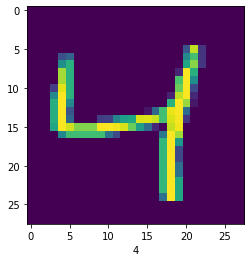

In [11]:
plot_show(X_train,y_train,2)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [26]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [16]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1578 - accuracy: 0.9532
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0544 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0164 - accuracy: 0.9945


In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0560 - accuracy: 0.9822


[0.056001435965299606, 0.982200026512146]

In [28]:
y_pred=model.predict(X_test)
y_pred

array([[7.2211921e-03, 7.6375103e-01, 7.5036943e-01, ..., 9.9999845e-01,
        4.3742549e-01, 6.1896861e-02],
       [5.0146610e-02, 2.5583261e-01, 9.9999976e-01, ..., 1.1029128e-04,
        5.4525393e-01, 3.0708015e-03],
       [5.5426180e-02, 9.9798512e-01, 1.1761516e-02, ..., 1.6367978e-01,
        9.4394398e-01, 1.8507808e-02],
       ...,
       [2.5652770e-07, 1.5286267e-02, 1.7985404e-03, ..., 4.8740771e-01,
        9.9402577e-01, 3.8039449e-01],
       [4.0343404e-04, 1.5752526e-05, 2.1415578e-06, ..., 4.5788288e-04,
        9.9922395e-01, 3.3202976e-02],
       [3.6107153e-02, 1.8569935e-05, 6.2393159e-02, ..., 1.1020212e-04,
        5.2699745e-02, 3.9407313e-03]], dtype=float32)

In [32]:
y_res=[np.argmax(element) for element in y_pred]
y_res[:5]

[7, 2, 1, 0, 4]

In [33]:
X_test = X_test.reshape(-1,28,28)
X_test.shape

(10000, 28, 28)

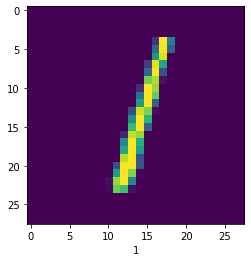

In [34]:
plot_show(X_test,y_res,2)

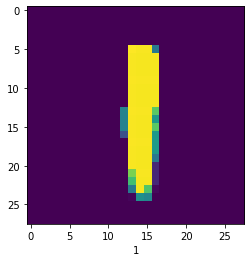

In [35]:
plot_show(X_test,y_res,345)

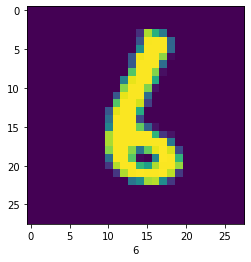

In [36]:
plot_show(X_test,y_res,834)